In [1]:
import tensorflow as tf
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.keras.backend.set_floatx('float64')
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [3]:
state="DL"

In [4]:
df=pd.read_csv('state_wise_daily_latest.csv')
df_=df.groupby("Status")
data=df_.get_group("Confirmed")
data=data[state]

In [5]:
series=data.values[::]
series=series.astype("float64")
series=np.cumsum(series)

In [6]:
series=np.reshape(series,(series.shape[0],1))
series.shape

(98, 1)

In [7]:
def make_data(series,window_size):
    
    data=[]
    labels=[]

    for i in range(len(series)-window_size):
        temp=series[i:i+window_size+1]
        data.append(temp[:window_size])
        labels.append(temp[window_size:,0])

    return np.array(data),np.array(labels)

In [8]:
split=75
train_series=series[:split]
test_series=series[split:]

In [9]:
batch_size=128
num_epochs=10000
window_size=14

In [10]:
train_data,train_labels=make_data(train_series,window_size)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset=train_dataset.batch(batch_size)

In [11]:
test_data,test_labels=make_data(test_series,window_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset=test_dataset.batch(batch_size)

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.8):
            print("\nCancelling training!")
            self.model.stop_training = True

In [13]:
callbacks = myCallback()

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
#     tf.keras.layers.LSTM(128,activation="relu", return_sequences=True),
    tf.keras.layers.GRU(64,activation="relu", return_sequences=True),
    tf.keras.layers.GRU(32,activation="relu", return_sequences=False), 
#     tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1),
])

In [15]:
model.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(),
              optimizer=tf.keras.optimizers.Adam())

In [16]:
history = model.fit(train_dataset, epochs=num_epochs,validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/10000
1/1 [==============================] - 0s 327ms/step - loss: 105.3426 - val_loss: 105.2063
Epoch 2/10000
1/1 [==============================] - 0s 14ms/step - loss: 103.3884 - val_loss: 103.0072
Epoch 3/10000
1/1 [==============================] - 0s 14ms/step - loss: 102.2355 - val_loss: 99.3946
Epoch 4/10000
1/1 [==============================] - 0s 14ms/step - loss: 100.4612 - val_loss: 99.8232
Epoch 5/10000
1/1 [==============================] - 0s 21ms/step - loss: 100.0754 - val_loss: 101.3138
Epoch 6/10000
1/1 [==============================] - 0s 20ms/step - loss: 100.2800 - val_loss: 101.1109
Epoch 7/10000
1/1 [==============================] - 0s 14ms/step - loss: 100.0037 - val_loss: 100.5471
Epoch 8/10000
1/1 [==============================] - 0s 13ms/step - loss: 99.6045 - val_loss: 96.2578
Epoch 9/10000
1/1 [==============================] - 0s 18ms/step - loss: 98.2646 - val_loss: 90.7883
Epoch 10/10000
1/1 [==============================] - 0s 18ms/step - 

1/1 [==============================] - 0s 15ms/step - loss: 24.1869 - val_loss: 5.3936
Epoch 81/10000
1/1 [==============================] - 0s 17ms/step - loss: 22.5180 - val_loss: 2.0527
Epoch 82/10000
1/1 [==============================] - 0s 14ms/step - loss: 24.1583 - val_loss: 11.6375
Epoch 83/10000
1/1 [==============================] - 0s 17ms/step - loss: 27.4241 - val_loss: 7.1813
Epoch 84/10000
1/1 [==============================] - 0s 12ms/step - loss: 27.4542 - val_loss: 9.8594
Epoch 85/10000
1/1 [==============================] - 0s 19ms/step - loss: 31.8940 - val_loss: 9.8360
Epoch 86/10000
1/1 [==============================] - 0s 13ms/step - loss: 29.7586 - val_loss: 39.5138
Epoch 87/10000
1/1 [==============================] - 0s 17ms/step - loss: 27.3529 - val_loss: 41.2361
Epoch 88/10000
1/1 [==============================] - 0s 15ms/step - loss: 32.3832 - val_loss: 39.8622
Epoch 89/10000
1/1 [==============================] - 0s 18ms/step - loss: 34.9782 - val_loss

1/1 [==============================] - 0s 14ms/step - loss: 26.7434 - val_loss: 22.6000
Epoch 160/10000
1/1 [==============================] - 0s 13ms/step - loss: 25.6381 - val_loss: 23.8171
Epoch 161/10000
1/1 [==============================] - 0s 17ms/step - loss: 27.0726 - val_loss: 17.3055
Epoch 162/10000
1/1 [==============================] - 0s 13ms/step - loss: 22.4514 - val_loss: 15.1746
Epoch 163/10000
1/1 [==============================] - 0s 16ms/step - loss: 22.8777 - val_loss: 14.0683
Epoch 164/10000
1/1 [==============================] - 0s 13ms/step - loss: 18.1313 - val_loss: 7.8404
Epoch 165/10000
1/1 [==============================] - 0s 15ms/step - loss: 20.8886 - val_loss: 6.0129
Epoch 166/10000
1/1 [==============================] - 0s 17ms/step - loss: 21.8398 - val_loss: 2.6204
Epoch 167/10000
1/1 [==============================] - 0s 16ms/step - loss: 16.7283 - val_loss: 3.5521
Epoch 168/10000
1/1 [==============================] - 0s 15ms/step - loss: 16.6255 

1/1 [==============================] - 0s 14ms/step - loss: 24.7361 - val_loss: 11.7343
Epoch 239/10000
1/1 [==============================] - 0s 14ms/step - loss: 25.0351 - val_loss: 12.9712
Epoch 240/10000
1/1 [==============================] - 0s 17ms/step - loss: 25.5755 - val_loss: 10.7534
Epoch 241/10000
1/1 [==============================] - 0s 13ms/step - loss: 26.9679 - val_loss: 12.8757
Epoch 242/10000
1/1 [==============================] - 0s 17ms/step - loss: 28.3501 - val_loss: 6.9235
Epoch 243/10000
1/1 [==============================] - 0s 17ms/step - loss: 25.5062 - val_loss: 12.5887
Epoch 244/10000
1/1 [==============================] - 0s 14ms/step - loss: 25.1702 - val_loss: 13.2648
Epoch 245/10000
1/1 [==============================] - 0s 19ms/step - loss: 27.7343 - val_loss: 3.4520
Epoch 246/10000
1/1 [==============================] - 0s 19ms/step - loss: 27.5724 - val_loss: 13.4953
Epoch 247/10000
1/1 [==============================] - 0s 14ms/step - loss: 27.789

In [17]:
pred=model.predict(test_data)
pred.shape

(9, 1)

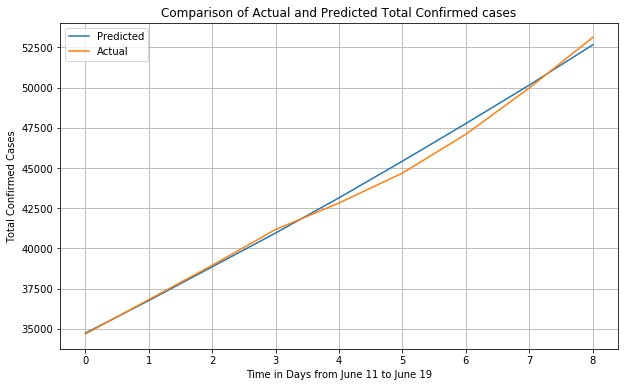

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(pred,label="Predicted")
plt.plot(test_labels,label="Actual")
plt.xlabel("Time in Days from June 11 to June 19")
plt.ylabel("Total Confirmed Cases")
plt.legend()
plt.title("Comparison of Actual and Predicted Total Confirmed cases")
plt.grid(True)
plt.show()
plt.savefig("LSTM-GRU-DL-Result.png")

In [20]:
tf.keras.metrics.mean_absolute_percentage_error(test_labels,pred).numpy().mean()

0.6814919551517361

In [21]:
tf.keras.models.save_model(model,'saved_model/DL_model',save_format='h5') 